Import dan Setup

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

Load Dataset

In [8]:
graded_csv = r"E:\DragonEye\dataset\graded_features.csv"
df = pd.read_csv(graded_csv)
df.head()

,filename,area,width,height,weight_est,texture_score,area_norm,weight_norm,texture_norm,grade_score,grade_label,label_asli
0,A_001.jpg,0.153740,140,115,25.18875,0.0,0.297923,0.297923,0.0,17.572487,C,A
1,A_002.jpg,0.154167,126,131,25.25875,0.0,0.300038,0.300038,0.0,17.619895,C,A
2,A_003.jpg,0.143059,140,122,23.43875,0.0,0.245053,0.245053,0.0,16.436485,C,A
3,A_004.jpg,0.154160,131,124,25.25750,0.0,0.300000,0.300000,0.0,17.619048,C,A
4,A_005.jpg,0.154747,131,124,25.35375,0.0,0.302908,0.302908,0.0,17.684457,C,A


Evaluasi Akurasi & Confusion Matrix

===== EVALUASI HASIL GRADING =====
Akurasi : 0.40210526315789474

Confusion Matrix:
 [[  0   0 141]
 [  0   0 143]
 [  0   0 191]]

Classification Report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00       141
           B       0.00      0.00      0.00       143
           C       0.40      1.00      0.57       191

    accuracy                           0.40       475
   macro avg       0.13      0.33      0.19       475
weighted avg       0.16      0.40      0.23       475



f:\python\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\python\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\python\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


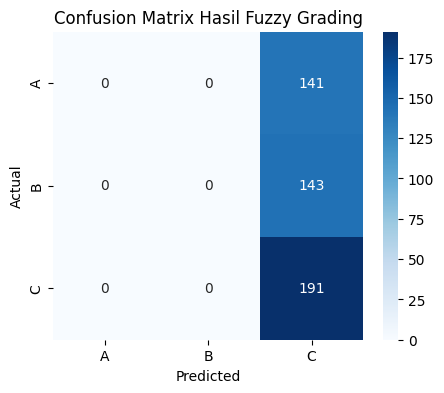

In [9]:
y_true = df['label_asli']
y_pred = df['grade_label']

print("===== EVALUASI HASIL GRADING =====")
print("Akurasi :", accuracy_score(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred, labels=['A', 'B', 'C'])
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C'], yticklabels=['A', 'B', 'C'])
plt.title("Confusion Matrix Hasil Fuzzy Grading")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Distribusi Grade

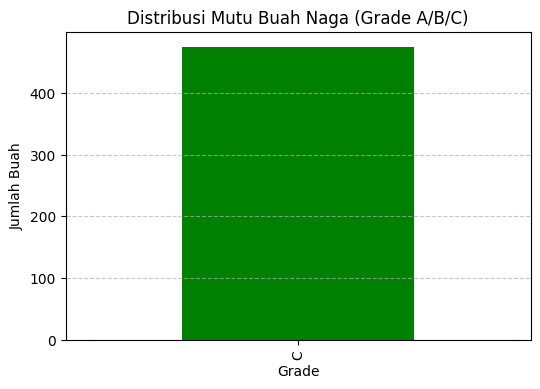

In [10]:
plt.figure(figsize=(6, 4))
df['grade_label'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Distribusi Mutu Buah Naga (Grade A/B/C)")
plt.xlabel("Grade")
plt.ylabel("Jumlah Buah")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Visualisasi Sebaran Fitur

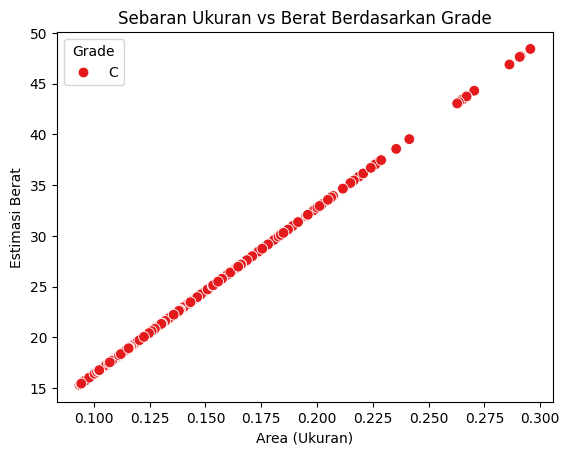

In [11]:
sns.scatterplot(data=df, x='area', y='weight_est', hue='grade_label', palette='Set1', s=60)
plt.title("Sebaran Ukuran vs Berat Berdasarkan Grade")
plt.xlabel("Area (Ukuran)")
plt.ylabel("Estimasi Berat")
plt.legend(title="Grade")
plt.show()

Tampilkan Beberapa Gambar Contoh

In [12]:
SEGMENTED_DIR = r"E:\DragonEye\dataset\segmented"

# Filter DataFrame untuk masing-masing grade dan ambil satu sampel untuk tiap grade
samples_A = df[df['grade_label'] == 'A'].sample(n=1)
samples_B = df[df['grade_label'] == 'B'].sample(n=1)
samples_C = df[df['grade_label'] == 'C'].sample(n=1)

# Gabungkan sampel dari ketiga grade
samples = pd.concat([samples_A, samples_B, samples_C])

# Plotting gambar
plt.figure(figsize=(12, 4))
for i, (_, row) in enumerate(samples.iterrows()):
    img_path = os.path.join(SEGMENTED_DIR, row['filename'])
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ubah BGR ke RGB untuk tampilan yang benar
        plt.subplot(1, 3, i + 1)  # Menyusun 3 gambar dalam 1 baris
        plt.imshow(img)
        plt.title(f"{row['filename']}\nGrade: {row['grade_label']}")
        plt.axis('off')
plt.show()

ValueError: a must be greater than 0 unless no samples are taken